In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as stats
from IPython.display import Image, display




In [78]:
df =  pd.read_csv("201902-fordgobike-tripdata.csv")

**Seeing the structure of the data**

In [84]:
df.shape

(183412, 16)

**A brief look into the data**

In [81]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


**Seeing some information about the data**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Data Wrangling

In [28]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [29]:
df = df.dropna(axis=0) # removing Nan rows

In [30]:
df.isnull().sum() #Check  the NaN values again

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [31]:


# Convert to datetime object
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract only the date
df['start_date_only'] = df['start_time'].dt.date

# Extract hour and store it in a new column
df['start_hour'] = df['start_time'].dt.hour

# Changing the colomn tyoe
df['start_date_only'] = pd.to_datetime(df['start_date_only'])



In [32]:
# Convert to datetime object
df['end_time'] = pd.to_datetime(df['end_time'])
# Extract only the date
df['end_date_only'] = df['end_time'].dt.date

# Extract hour and store it in a new column
df['end_hour'] = df['end_time'].dt.hour

# Changing the colomn tyoe
df['end_date_only'] = pd.to_datetime(df['end_date_only'])

In [33]:
df.info() #Chck  the data types again

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type            

In [85]:
df["duration_sec"] = df["duration_sec"] / 3600 # changing it imto hours for better understnding
df = df.rename(columns={"duration_sec":"duration_hour"})



In [86]:
df.heaf(5) #Check  the dataframe

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,14.495833,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,11.811389,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,17.181667,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,10.136111,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,0.440278,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,0.133333,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,0.086944,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,0.039167,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,0.038611,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


<Axes: ylabel='duration_hour'>

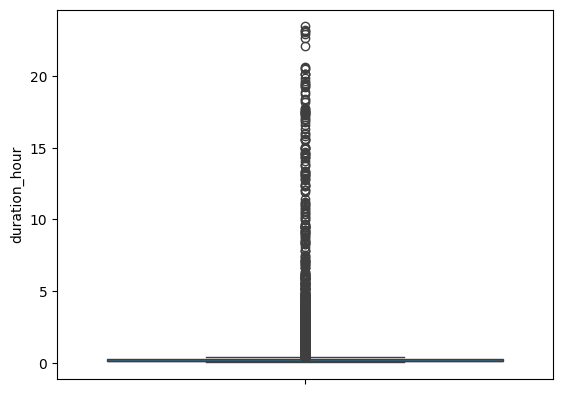

In [36]:
sns.boxplot(df['duration_hour']) #Check some outliers


As expected there are outliers)
data that is extreme to the most of the data so i will delete them

In [37]:
#We will use the quartike method so we can  eliminate the outliers
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration_hour'].quantile(0.25)
Q3 = df['duration_hour'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['duration_hour'] >= lower_bound) & (df['duration_hour'] <= upper_bound)]



<Axes: ylabel='duration_hour'>

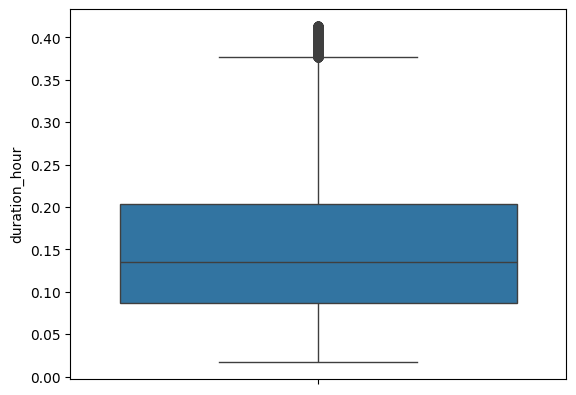

In [38]:
sns.boxplot(df['duration_hour'])


In [39]:
df['age'] = 2019 - df['member_birth_year']


C:\Users\Ymgen\AppData\Local\Temp\ipykernel_10616\2571611218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2019 - df['member_birth_year']


**Data visualization**

**what is the most hour in bike renting ?**

In [40]:
hour_counts = df['start_hour'].value_counts().sort_index()  # Count rentals per month




In [96]:
def plot_label(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)


C:\Users\Ymgen\AppData\Local\Temp\ipykernel_10616\1169405313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")


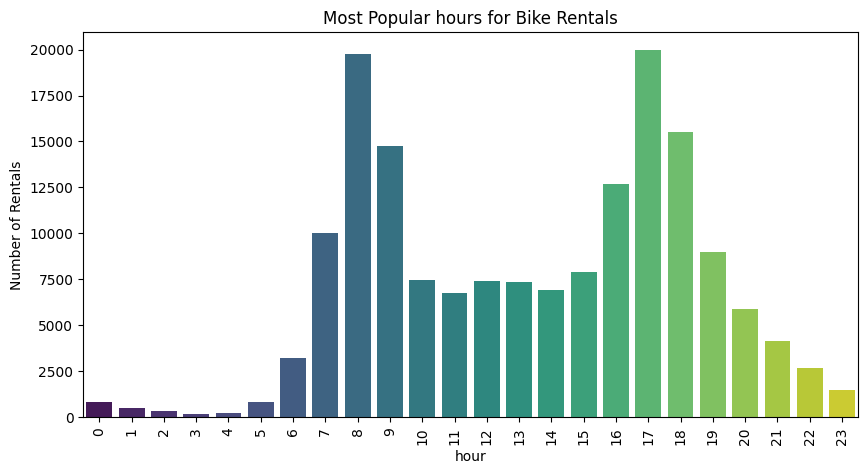

In [98]:

plt.figure(figsize=(10,5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")


plot_label("Most Popular hours for Bike Rentals", "hour", "Number of Rentals")
plt.savefig("Most Popular hours for Bike Rentals.png")


 **What gender we should target more ?**

In [90]:
gender_counts = df['member_gender'].value_counts().sort_index()  # Count rentals per month
gender_counts

member_gender
Female     40844
Male      130651
Other       3652
Name: count, dtype: int64

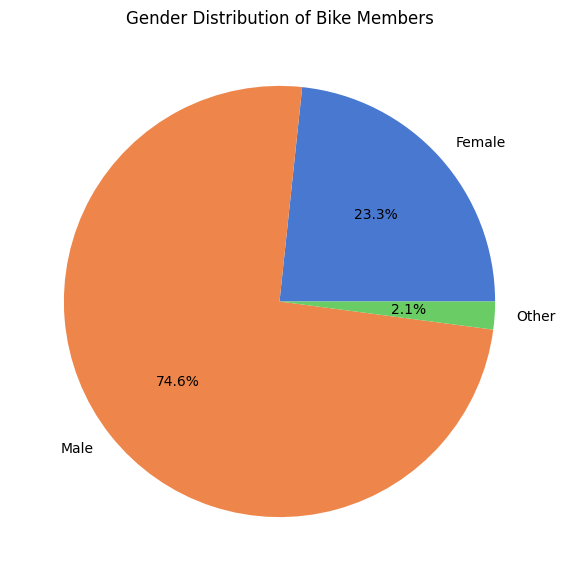

In [94]:
plt.figure(figsize=(7, 7))
colors = sns.color_palette("muted")

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)

plt.title("Gender Distribution of Bike Members")
plt.savefig("Gender Distribution of Bike Members.png")


In [45]:
gender_counts = df['end_station_name'].value_counts()  # Count rentals per month
gender_counts

end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4580
Market St at 10th St                                         3635
Montgomery St BART Station (Market St at 2nd St)             3352
San Francisco Ferry Building (Harry Bridges Plaza)           2918
San Francisco Caltrain (Townsend St at 4th St)               2845
                                                             ... 
Farnam St at Fruitvale Ave                                      5
Parker Ave at McAllister St                                     5
21st Ave at International Blvd                                  5
16th St Depot                                                   4
Willow St at Vine St                                            4
Name: count, Length: 329, dtype: int64

**is there a relation between the ride durarion and the age?**

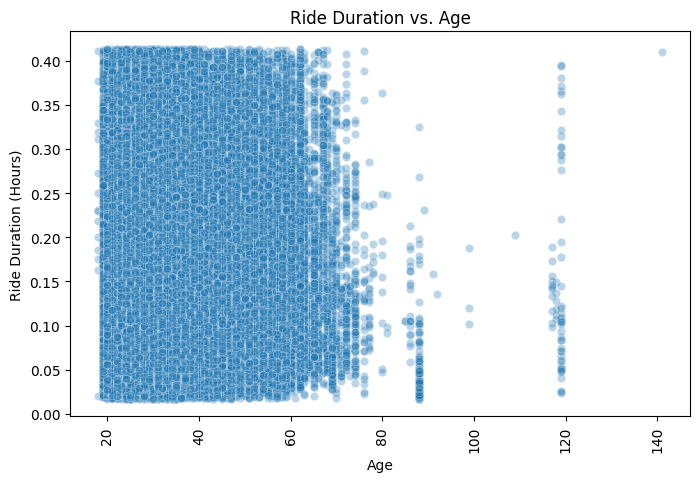

In [63]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='duration_hour', alpha=0.3)
plot_label("Ride Duration vs. Age", "Age", "Ride Duration (Hours)")
plt.savefig("Ride Duration vs. Age.png")


**Further investigation of how age affects the  ride duration?**

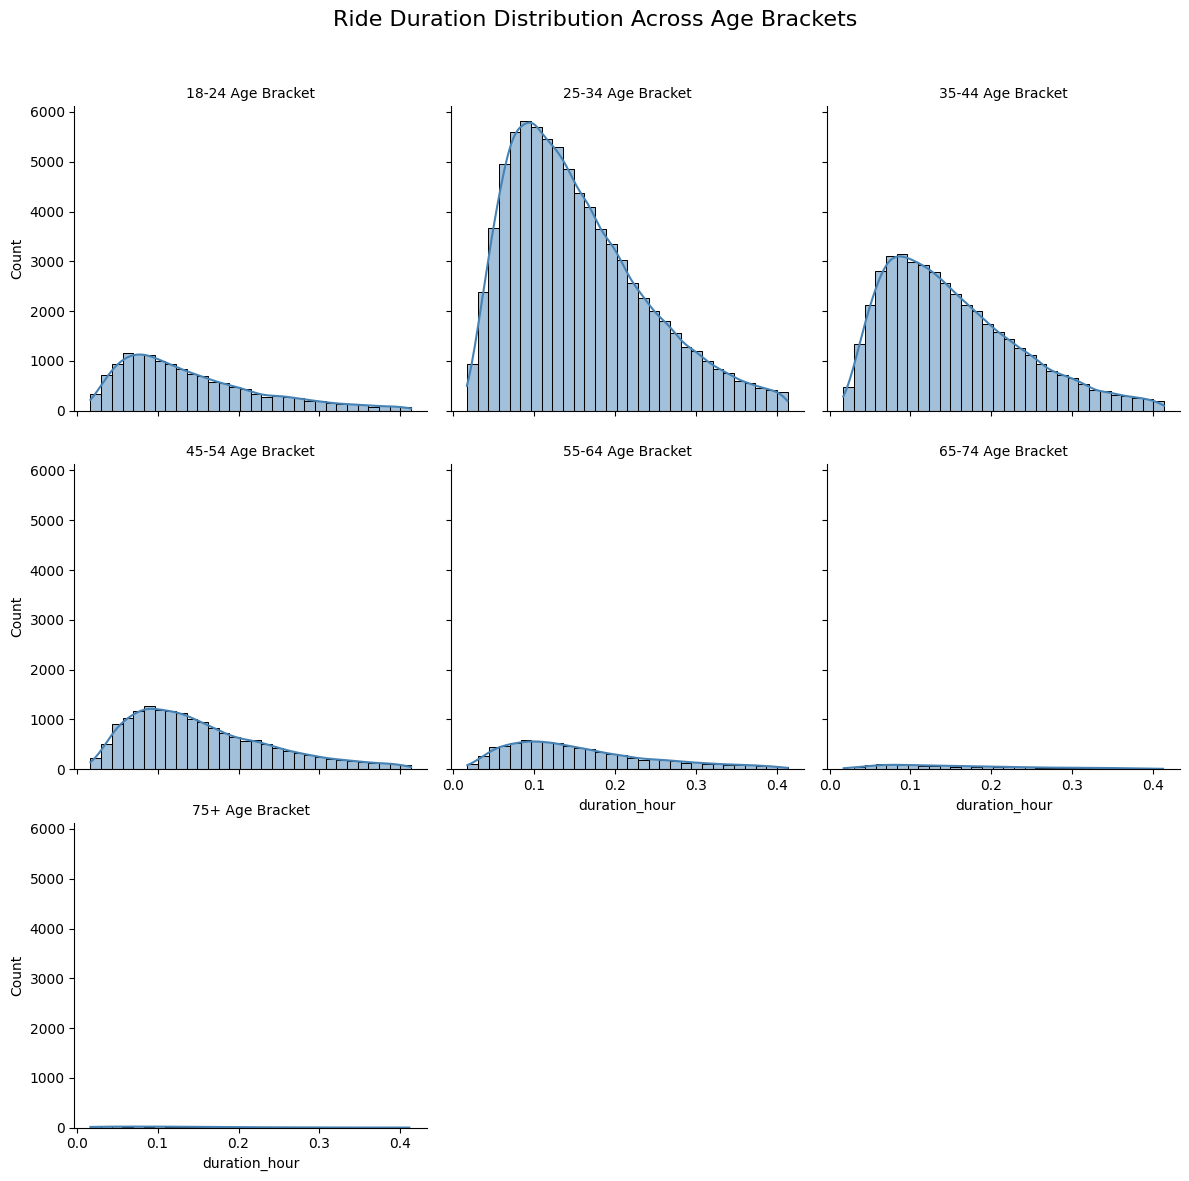

In [60]:

# Define age brackets
bins = [18, 24, 34, 44, 54, 64, 74, 100]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]

df['age_bracket'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Remove extreme outliers for better visualization
df = df[df['duration_hour'] < 1]  # Filtering durations under 1 hour

# Plot histogram
g = sns.FacetGrid(df, col="age_bracket", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="duration_hour", bins=30, kde=True, color="steelblue")

g.set_titles(col_template="{col_name} Age Bracket")
g.fig.suptitle("Ride Duration Distribution Across Age Brackets", fontsize=16)
g.fig.subplots_adjust(top=0.90)  # ضبط المساحة العلوية لتجنب التداخل

plt.savefig("Ride Duration Distribution Across Age Brackets.png")


**How  gender affects the ride duration?**

C:\Users\Ymgen\AppData\Local\Temp\ipykernel_10616\112713446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='member_gender', y='duration_hour', palette="coolwarm")


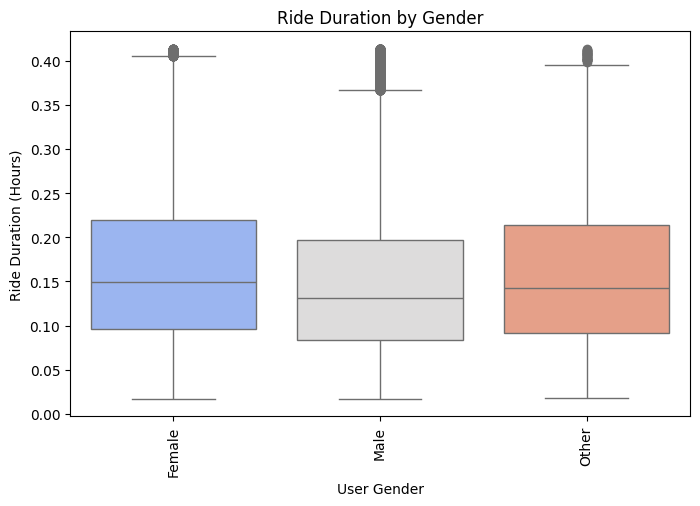

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='member_gender', y='duration_hour', palette="coolwarm")
plot_label("Ride Duration by Gender", "User Gender", "Ride Duration (Hours)")


plt.savefig("Ride Duration by Gender.png")


**How the type of the user affects the ride duration?**

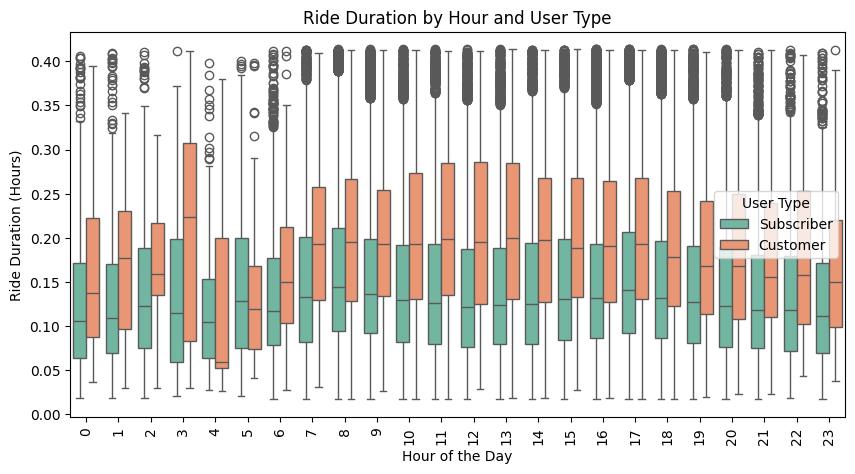

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='start_hour', y='duration_hour', hue='user_type', palette="Set2")
plot_label("Ride Duration by Hour and User Type", "Hour of the Day", "Ride Duration (Hours)")
plt.legend(title="User Type")
plt.savefig("Ride Duration by Hour and User Type.png")


**Finding possible correlation between age, duration hour, starthour**

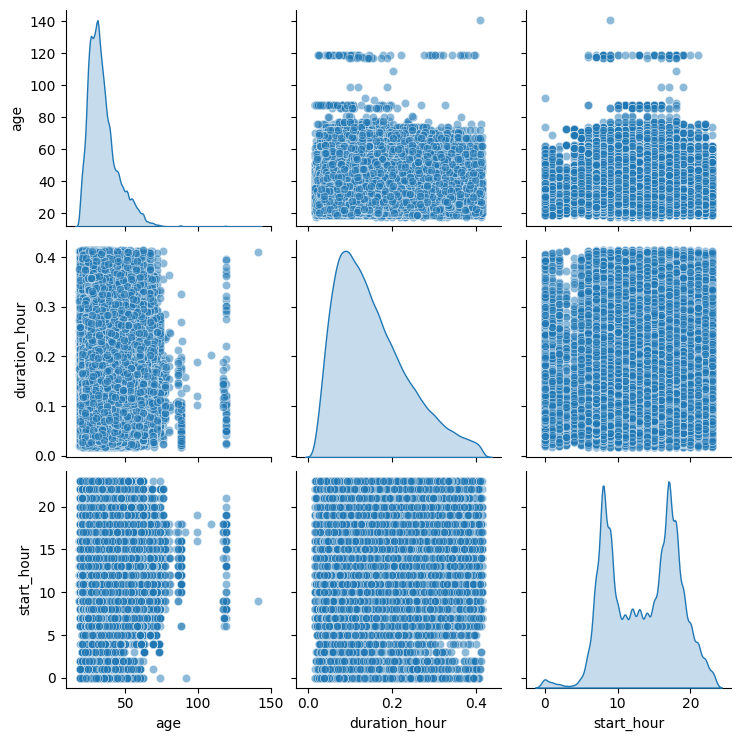

In [76]:
sns.pairplot(df[['age', 'duration_hour', 'start_hour']], diag_kind='kde',plot_kws={'alpha': 0.5})
plt.savefig("age_durationhour_starthour.png")

**Number of trips between stations**


Text(0.5, 1.0, 'Heatmap of Trips Between Stations')

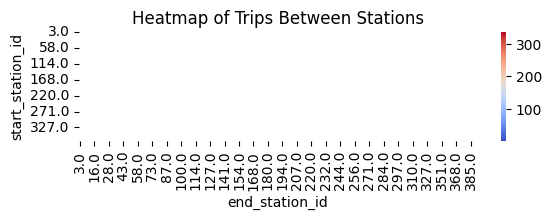

In [99]:
pivot_table = df.pivot_table(index="start_station_id", columns="end_station_id", values="bike_id", aggfunc="count")
plt.subplot(3, 1, 1)
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Trips Between Stations")

**In the previous heatmap, we had too many stations, leading to a sparse, unreadable visualization.**

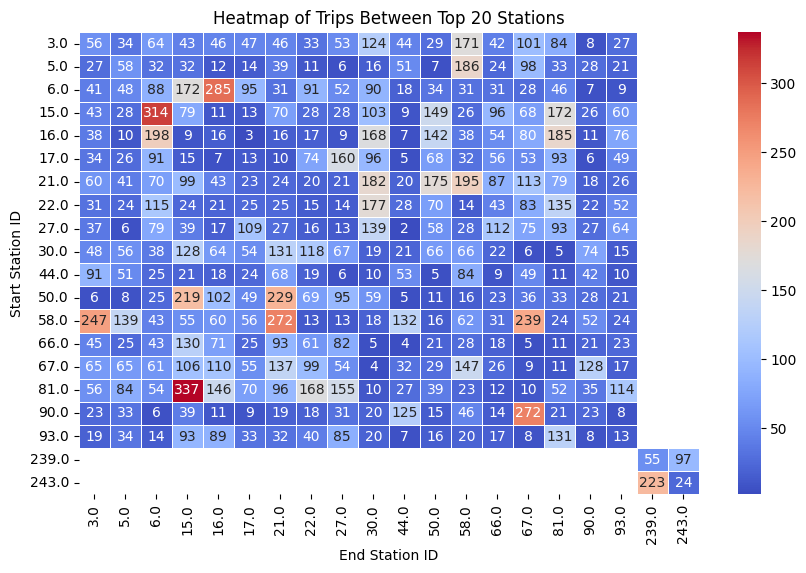

In [119]:
# Find top 20 busiest stations
top_stations = df["start_station_id"].value_counts().head(20).index

# Filter data for only those stations
filtered_df = df[df["start_station_id"].isin(top_stations) & df["end_station_id"].isin(top_stations)]

# Create pivot table again
pivot_table_filtered = filtered_df.pivot_table(index="start_station_id", columns="end_station_id", values="bike_id", aggfunc="count")

# Plot new heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_filtered, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")  # Adding annotations for better readability
plt.title("Heatmap of Trips Between Top 20 Stations")
plot_label("Heatmap of Trips Between Top 20 Stations", "End Station ID", "Start Station ID")

# Save & Show
plt.savefig("heatmap_top20_stations.png", dpi=300, bbox_inches="tight")
plt.show()


**Number of trips by user type and gender**


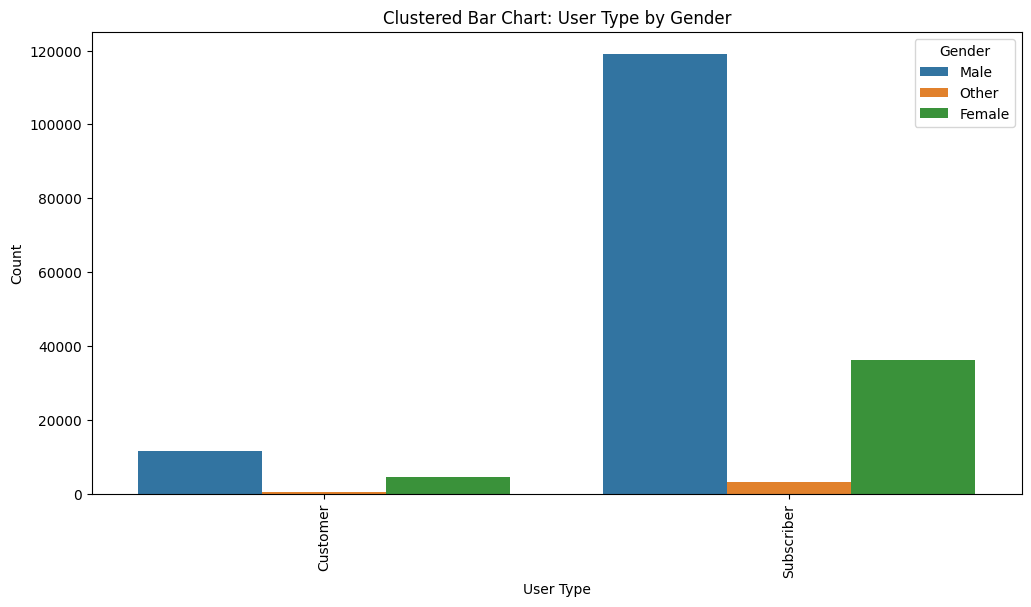

In [120]:
plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x="user_type", hue="member_gender")
plot_label("Clustered Bar Chart: User Type by Gender", "User Type", "Count")
plt.savefig("bar_chart_user_type_gender.png", dpi=300, bbox_inches="tight")
plt.legend(title="Gender", loc="upper right")  # Move legend to a better spot
plt.show()


**Distribution of trip duration**

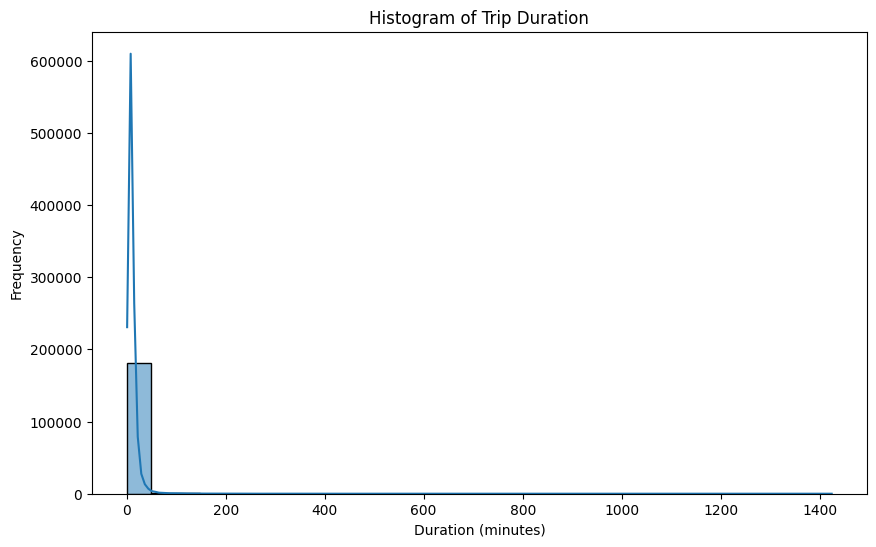

In [117]:
import numpy as np
plt.figure(figsize=(10,6))

# Convert duration to minutes
duration_minutes = df["duration_hour"] * 60  

# Use np.linspace for better binning
bins = np.linspace(duration_minutes.min(), duration_minutes.max(), num=30)

sns.histplot(duration_minutes, bins=bins, kde=True)
plt.title("Histogram of Trip Duration")
plt.xlabel("Duration (minutes)")  # Fix the label
plt.ylabel("Frequency")
plt.show()


**I really can not get something useful out of that so i will see  the users favourite duration under 60 minute**

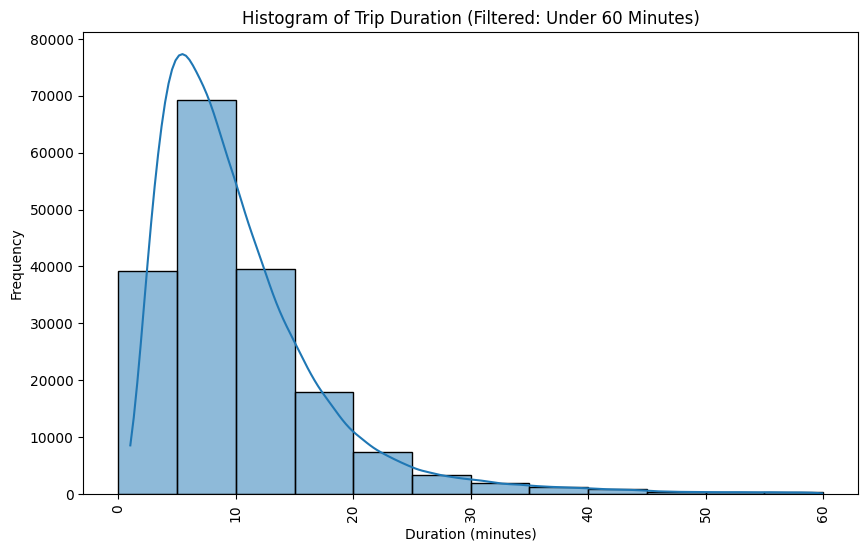

In [122]:

# Filter out trips longer than 60 minutes
filtered_duration = df[df["duration_hour"] * 60 < 60]["duration_hour"] * 60  

plt.figure(figsize=(10,6))

# Define bins (every 5 minutes)
bins = np.arange(0, 61, 5)

# Plot histogram
sns.histplot(filtered_duration, bins=bins, kde=True)
plot_label("Histogram of Trip Duration (Filtered: Under 60 Minutes)", "Duration (minutes)", "Frequency")

plt.savefig("histogram_trip_duration.png", dpi=300, bbox_inches="tight")
plt.show()
